In [1]:
# set up jupyter
from IPython.display import display, Markdown # pretty display
from IPython.core.interactiveshell import InteractiveShell # multi output

InteractiveShell.ast_node_interactivity = "all" # type: ignore

In [2]:
# import packages
import pandas as pd
from imblearn.over_sampling import SMOTE
from joblib import dump
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from utils.plotter import Plotter # type: ignore

In [3]:
# get preprocessed data
data = pd.read_csv("./dataset/preprocessed.csv") # type: ignore
Markdown("# Preprocessed data")
display(data)

# Preprocessed data

,Avg Packet Size,Avg Bwd Segment Size,Bwd Packet Length Max,Bwd Packet Length Mean,Bwd Packet Length Min,Bwd Packet Length Std,Down/Up Ratio,Packet Length Max,Packet Length Std,Packet Length Variance,Class
0,401.500000,0.000000,0.0,0.000000,0.0,0.000000,0.0,393.0,33.617596,1130.1428,1
1,601.500000,0.000000,0.0,0.000000,0.0,0.000000,0.0,401.0,0.000000,0.0000,1
2,574.500000,0.000000,0.0,0.000000,0.0,0.000000,0.0,383.0,0.000000,0.0000,1
3,432.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,369.0,21.361180,456.3000,1
4,442.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,389.0,32.315630,1044.3000,1
...,...,...,...,...,...,...,...,...,...,...,...
431366,10.333333,31.000000,31.0,31.000000,31.0,0.000000,0.0,31.0,15.500000,240.2500,0
431367,31.000000,20.666666,31.0,20.666666,0.0,17.897858,3.0,31.0,13.863622,192.2000,0
431368,0.000000,0.000000,0.0,0.000000,0.0,0.000000,2.0,0.0,0.000000,0.0000,0
431369,80.750000,97.000000,97.0,97.000000,97.0,0.000000,1.0,97.0,29.577019,874.8000,0


In [4]:
# prep data
labels = data["Class"]
features = data.drop("Class", axis=1)

# splits
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=5)

In [5]:
# create plotter for test results
plotter = Plotter(y_test)

In [6]:
# dataset is very imbalanced, oversample to address this
oversampler = SMOTE(random_state=0)
smote_x, smote_y = oversampler.fit_resample(x_train, y_train) # type: ignore

In [7]:
# train and save decision tree
dtc = DecisionTreeClassifier().fit(smote_x.values, smote_y.values)
dtc_path = "../models/decision_tree.joblib"
_ = dump(dtc, dtc_path)
Markdown(f"Saved decision tree model to `{dtc_path}`")

Saved decision tree model to `../models/decision_tree.joblib`

# Results: Decision Tree

[[24386    89]
 [ 2102 81266]]
Accuracy:  0.9796834286880002
Precision:  0.9989060291315838
Recall:  0.9747864888206506


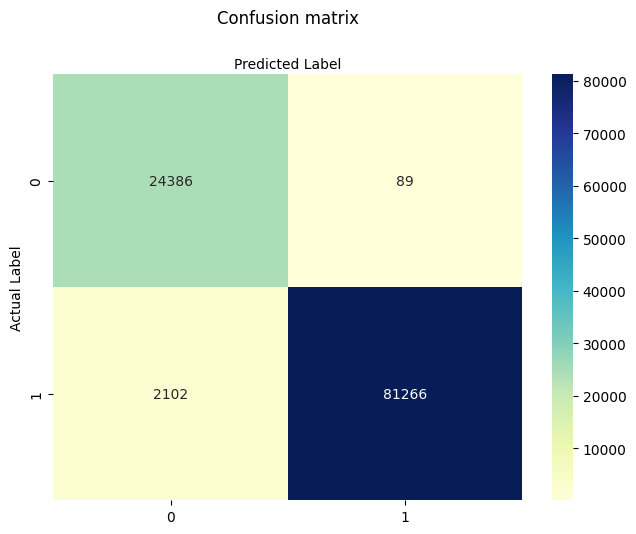

In [8]:
dtc_pred = dtc.predict(x_test.values)
Markdown("# Results: Decision Tree")
plotter(dtc_pred)

In [9]:
# train and save random forest
rfc = RandomForestClassifier().fit(smote_x.values, smote_y.values)
rfc_path = "../models/random_forest.joblib"
_ = dump(rfc, rfc_path)
Markdown(f"Saved random forest model to `{rfc_path}`")

Saved random forest model to `../models/random_forest.joblib`

# Results: Random Forest

[[24392    83]
 [ 2102 81266]]
Accuracy:  0.9797390651224466
Precision:  0.9989797047290071
Recall:  0.9747864888206506


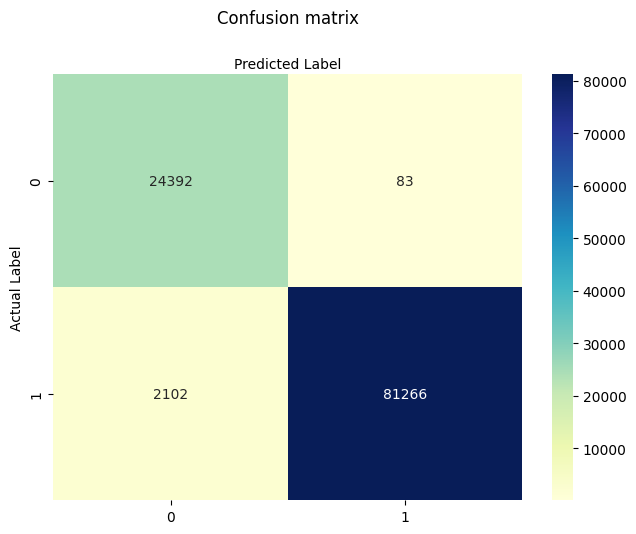

In [10]:
# test random forest
rfc_pred = rfc.predict(x_test.values)
Markdown("# Results: Random Forest")
plotter(rfc_pred)

In [11]:
# train and save gradient boosting
gbc = GradientBoostingClassifier().fit(smote_x.values, smote_y.values)
gbc_path = "../models/gradient_boosting.joblib"
_ = dump(gbc, gbc_path)
Markdown(f"Saved gradient boosting model to `{rfc_path}`")

Saved gradient boosting model to `../models/random_forest.joblib`

# Results: Gradient Boosting

[[24378    97]
 [ 2253 81115]]
Accuracy:  0.9782090631751713
Precision:  0.9988055952322317
Recall:  0.9729752422992035


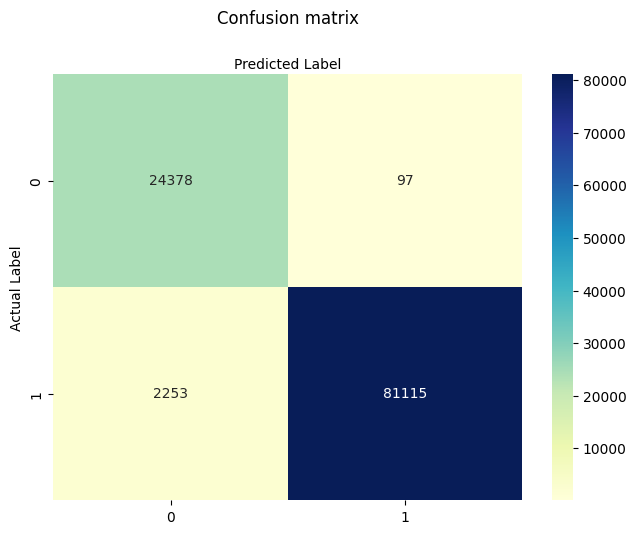

In [12]:
# test gradient boosting
gbc_pred = gbc.predict(x_test.values)
Markdown("# Results: Gradient Boosting")
plotter(gbc_pred)